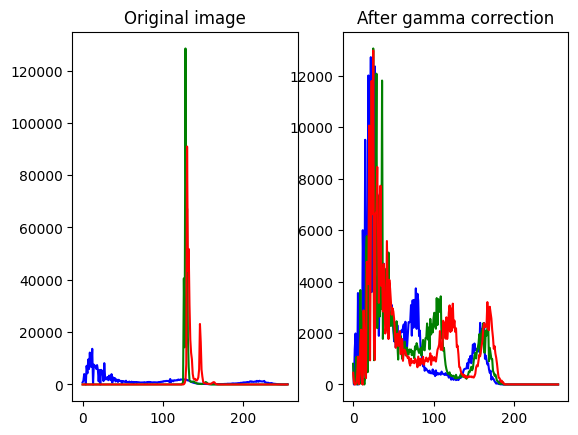

In [110]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt

img=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)  #read the image
imgc=cv.cvtColor(img,cv.COLOR_BGR2LAB) #convert to L*a*b* plane
L,A,B=cv.split(imgc) #split the L*a*b* plane


gamma=0.7 #gamma value
tL = np.array([(L[i]/100.0)**(gamma)*100.0 for i in np.arange(0,len(L))]).astype('uint8') #gamma correction to L-plane
LAB=cv.merge([tL,A,B]) #merge the L,a,b values


img_gamma=cv.cvtColor(LAB,cv.COLOR_LAB2BGR) #convert to RGB color plane
cv.imwrite('Converted.jpg',img_gamma)  #writing the converted image

color = ('b','g','r')  #tuple of colors
fig ,ax = plt.subplots(1,2)
for i,c in enumerate(color):
    hist_orig=cv.calcHist([imgc],[i],None,[256],[0,256])   #histogram of original image
    ax[0].plot(hist_orig,color=c)
    ax[0].set_title('Original image')
    hist_gamma = cv.calcHist([img_gamma],[i],None,[256],[0,256])  #histogram of image after gamma correction
    ax[1].plot(hist_gamma,color=c)
    ax[1].set_title('After gamma correction')
plt.savefig('Histogram.jpg')  #saving the image of histogram
plt.show()
